In [ ]:
!pip install pydriller

     |████████████████████████████████| 65 kB 2.5 MB/s 
     |████████████████████████████████| 64 kB 3.2 MB/s 
     |████████████████████████████████| 180 kB 41.3 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 


In [ ]:
!pip install transformers

     |████████████████████████████████| 3.1 MB 5.3 MB/s 
     |████████████████████████████████| 59 kB 6.9 MB/s 
     |████████████████████████████████| 596 kB 51.6 MB/s 
     |████████████████████████████████| 895 kB 41.9 MB/s 
     |████████████████████████████████| 3.3 MB 51.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


**Import necessary libraries**

In [134]:
#for data
import pandas as pd 

#for github scraping
import os
import requests
import time
import sys
import json
from requests_oauthlib import OAuth1Session
from requests_oauthlib import OAuth1

#text preprocessing
import nltk
import string

stop_words = stopwords.words('english')

from tqdm.auto import tqdm
from collections import Counter

from nltk import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from gensim.models import Word2Vec

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

import re

import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:


file_no=1

def gettoken():
  with open('/drive/MyDrive/token.txt', 'r') as token:
        gittoken = token.readline().replace("\n","")
  return gittoken

#print(gettoken())

def searchgit(fixes,commits):
    
    params = (
      ('q', fixes),('per_page',100) )
   
    headers = {'Accept': 'application/vnd.github.cloak-preview', 'Authorization': 'token ' + gettoken()}
    url = "https://api.github.com/search/commits"
  
    for i in range(0,100):
        print(i,fixes, commits)
        limit = 0
        while(limit == 0):
            response = requests.get(url,headers=headers,params=(('q',fixes),('per_page',100)))
            head = response.headers      
            if 'X-RateLimit-Remaining' in head:
                limit = int(head['X-RateLimit-Remaining'])
                if limit == 0:
                # Limit of requests per time was reached, sleep to wait until we can request again
                    print("Rate limit. Sleep.")
                    global file_no
                    file_no+=1
                    #file_name = '/drive/MyDrive/git_commits_XSS'+str(file_no)+'.json'
                    #file_name = '/drive/MyDrive/git_commits_SQL'+str(file_no)+'.json'
                    #file_name = '/drive/MyDrive/git_commits_Buffer'+str(file_no)+'.json'
                    file_name = '/drive/MyDrive/git_commits_Improperaccess'+str(file_no)+'.json'
                    print(file_name)
                    content= response.json()
                    with open(file_name, 'w') as commitfile:
                        json.dump(content, commitfile)  
                    time.sleep(35)  
        if 'Link' not in head:
            break;                  
                    
   
    
    # for j in range(0, len(content)):
    #     repo = content["items"][j]["repository"]["html_url"]
    

   


  
  


In [ ]:
commits = {}

#load previously scraped commits
'''
with open('/drive/MyDrive/git_commits_XSS.json','r') as jsonfile:
    data = jsonfile.read()
    commits= json.loads(data.decode("utf-8"))
'''   
#print(data)
    
#vulnerabilities = ["XSS","cross site","cross site request forgery"]   
#vulnerabilities = ["SQL","SQLI","injection"]
#vulnerabilities =["buffer","overflow","stack"]
vulnerabilities =["improper","unauthenticated","gain access","permission"]
#fixwords = ["prevent", "fix", "attack", "protect", "issue", "correct", "update", "improve", "change", "check", "malicious", "insecure", "vulnerable", "vulnerability"]
fixwords = ["malicious", "insecure", "vulnerable", "vulnerability","vulnerabilities"]

In [ ]:


#for all combinations of vulnerabilities and fixwords, scrape github 
for v in vulnerabilities:
  for fix in fixwords:
      searchgit(v + " " + fix, commits ); 

In [ ]:
import glob

countxss = 0
countsqli = 0
countimproperaccess = 0
for file in glob.glob('/drive/MyDrive/git_commits_XSS*.json'):
    countxss+=1
    print(file)

for file in glob.glob('/drive/MyDrive/git_commits_SQL*.json'):
    countsqli+=1

for file in glob.glob('/drive/MyDrive/git_commits_Improperaccess*.json'):
    countimproperaccess+=1
#
# print(countxss)
# print(countsqli)
# print(countimproperaccess)

In [ ]:
countxss

58

In [ ]:
#extracting messages for xss

xss_msg=list()
filename_xss = list()

for i in range(2,countxss+2):
  with open('/drive/MyDrive/git_commits_XSS'+str(i)+'.json')as inputfile:
    data = json.load(inputfile)
    if i==5 or i==46 or i==49: #file numbers without any data because of limit exceeded error
      continue
    else:
     # print(i, len(data["items"]))
     for j in range(0,len(data["items"])):
       filename_xss.append( '/drive/MyDrive/git_commits_XSS'+str(i)+'.json')
       xss_msg.append(data["items"][j]["commit"]["message"])
#print(type(data))

final_data_xss= {'message':xss_msg,'type':'XSS','filename':filename_xss}
data_frame_xss = pd.DataFrame(final_data_xss)

#with open(/drive/MyDrive/git_commits_XSS'+str(i)+'.json)

In [ ]:
data_frame_xss

,message,type,filename
0,Add parameterized queries to protect against m...,XSS,/drive/MyDrive/git_commits_XSS2.json
1,Replace malicious sql query\n\nLet's show an a...,XSS,/drive/MyDrive/git_commits_XSS2.json
2,Escaped query values to prevent SQL injection ...,XSS,/drive/MyDrive/git_commits_XSS2.json
3,setup a defence for malicious SQL injection,XSS,/drive/MyDrive/git_commits_XSS2.json
4,ecure/prevent sql malicious injection,XSS,/drive/MyDrive/git_commits_XSS2.json
...,...,...,...
5495,[NSE] Added http-csrf.nse that detects Cross S...,XSS,/drive/MyDrive/git_commits_XSS59.json
5496,[NSE] Added http-csrf.nse that detects Cross S...,XSS,/drive/MyDrive/git_commits_XSS59.json
5497,[NSE] Added http-csrf.nse that detects Cross S...,XSS,/drive/MyDrive/git_commits_XSS59.json
5498,[NSE] Added http-csrf.nse that detects Cross S...,XSS,/drive/MyDrive/git_commits_XSS59.json


In [ ]:
countsqli

44

In [ ]:
#extracting messages for sql

sql_msg=list()
filename_sql = list()

for i in range(2,countsqli+2):
  with open('/drive/MyDrive/git_commits_SQL'+str(i)+'.json')as inputfile:
    data = json.load(inputfile)
    for j in range(0,len(data["items"])):
      filename_sql.append( '/drive/MyDrive/git_commits_SQL'+str(i)+'.json')
      sql_msg.append(data["items"][j]["commit"]["message"])

final_data_sql= {'message':sql_msg,'type':'SQLI','filename':filename_sql}
data_frame_sql = pd.DataFrame(final_data_sql)


In [ ]:
#extracting messages for improper access

ia_msg=list()
filename_ia = list()

for i in range(2,countimproperaccess+2):
  with open('/drive/MyDrive/git_commits_Improperaccess'+str(i)+'.json')as inputfile:
    data = json.load(inputfile)
    if i==40:  #file numbers to ignore
      continue
    else:
      #print(i, len(data["items"]))
      for j in range(0,len(data["items"])):
        filename_ia.append( '/drive/MyDrive/git_commits_Improperaccess'+str(i)+'.json')
        ia_msg.append(data["items"][j]["commit"]["message"])

final_data_ia= {'message':ia_msg,'type':'ImproperAccess','filename':filename_ia}
data_frame_ia = pd.DataFrame(final_data_ia)


In [ ]:
data_frame_ia

,message,type,filename
0,Iranian Government-Sponsored APT Cyber Actors ...,ImproperAccess,/drive/MyDrive/git_commits_Improperaccess2.json
1,exiv2: Fix CVE-2021-3482\n\n References\n...,ImproperAccess,/drive/MyDrive/git_commits_Improperaccess2.json
2,exiv2: Fix CVE-2021-3482\n\n References\n...,ImproperAccess,/drive/MyDrive/git_commits_Improperaccess2.json
3,exiv2: Fix CVE-2021-3482\n\n References\n...,ImproperAccess,/drive/MyDrive/git_commits_Improperaccess2.json
4,exiv2: Fix CVE-2021-3482\n\n References\n...,ImproperAccess,/drive/MyDrive/git_commits_Improperaccess2.json
...,...,...,...
6195,Fix security vulnerability in DPMS\n\nChanged ...,ImproperAccess,/drive/MyDrive/git_commits_Improperaccess64.json
6196,Fix security vulnerability in DPMS\n\nChanged ...,ImproperAccess,/drive/MyDrive/git_commits_Improperaccess64.json
6197,Fix security vulnerability in DPMS\n\nChanged ...,ImproperAccess,/drive/MyDrive/git_commits_Improperaccess64.json
6198,Fix security vulnerability in DPMS\n\nChanged ...,ImproperAccess,/drive/MyDrive/git_commits_Improperaccess64.json


**Preprocessing Text**

In [113]:
#Remove duplicate values if any from data
def duplicate_content_removal(data, col, ini_row):
    print("\nBefore removing duplicates, number of data was : ", ini_row)
    duplicate_count = data[col].duplicated().sum()
    print("\nNumber of Duplicates: ", duplicate_count)

    description_data = data[col].drop_duplicates()
    cleaned_row = len(description_data)
    
    if (ini_row - cleaned_row) > 0:
        print("\nTotal data reduction : ", (ini_row - cleaned_row))
        print("\nAfter removing duplicates, number of data is :", cleaned_row)
    else:
        print("\nDataset doesn't content any duplicate data.")
    
    return list(description_data)

In [114]:
xss_message=duplicate_content_removal(data_frame_xss, 'message', data_frame_xss.shape[0])


Before removing duplicates, number of data was :  5500

Number of Duplicates:  4905

Total data reduction :  4905

After removing duplicates, number of data is : 595


In [115]:
sql_message=duplicate_content_removal(data_frame_sql, 'message', data_frame_sql.shape[0])


Before removing duplicates, number of data was :  4400

Number of Duplicates:  4009

Total data reduction :  4009

After removing duplicates, number of data is : 391


In [116]:
improperaccess_message = duplicate_content_removal(data_frame_ia,'message',data_frame_ia.shape[0])


Before removing duplicates, number of data was :  6200

Number of Duplicates:  5708

Total data reduction :  5708

After removing duplicates, number of data is : 492


In [117]:
final_messages_data = xss_message+sql_message+improperaccess_message

In [118]:
final_messages_data

['Add parameterized queries to protect against malicious SQL injections',
 "Replace malicious sql query\n\nLet's show an actual attack that loads username & password",
 'Escaped query values to prevent SQL injection inserting malicious values into database',
 'setup a defence for malicious SQL injection',
 'ecure/prevent sql malicious injection',
 'MDL-70804 mnet: Use proper DML method to get records from the table\n\nThis improves the code and avoids the risk of SQL injection through the\nmalicious XML-RPC request from the MNet peer.',
 'sql/pgwire: Use InvalidAuthorizationSpecification code on failed auth\n\nThis matches the Postgres behavior, and helps clients react better to\nfailed authentication attempts.\n\nPostgres actually uses the InvalidPassword password if the password\nentered during authentication is incorrect, but this change does not\nmatch that behavior. Returning InvalidPassword would reveal extra information\nto a potentially malicious party who is guessing users/pas

In [120]:
def remove_link_punc(string):
    # removing links
    temp_string = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', string)

    # removing all everything except a-z english letters
    regex = re.compile('[^a-zA-Z]')
    temp_string = regex.sub(' ', temp_string)

    # removing extra spaces
    clean_string = re.sub(' +', ' ', temp_string).lower()    

    return clean_string

In [128]:
def data_cleaning(content):
    sentences = []
    for idx in tqdm(range(len(content))):
        
        if content[idx] !="":
            # Sentence tokenization using NLTK library
            for each_sent in  sent_tokenize(str(content[idx])):
                
                if each_sent != "":
                    temp_sent = []
                    # Removing link and punctuation
                    each_sent = remove_link_punc(each_sent.lower())

                    sentences.append(each_sent)
    
    return sentences

In [129]:
sent_corpus = data_cleaning(final_messages_data)

  0%|          | 0/1478 [00:00<?, ?it/s]

In [130]:
sent_corpus

['add parameterized queries to protect against malicious sql injections',
 'replace malicious sql query let s show an actual attack that loads username password',
 'escaped query values to prevent sql injection inserting malicious values into database',
 'setup a defence for malicious sql injection',
 'ecure prevent sql malicious injection',
 'mdl mnet use proper dml method to get records from the table this improves the code and avoids the risk of sql injection through the malicious xml rpc request from the mnet peer ',
 'sql pgwire use invalidauthorizationspecification code on failed auth this matches the postgres behavior and helps clients react better to failed authentication attempts ',
 'postgres actually uses the invalidpassword password if the password entered during authentication is incorrect but this change does not match that behavior ',
 'returning invalidpassword would reveal extra information to a potentially malicious party who is guessing users passwords ',
 'release n

In [131]:
len_count = []
for l in sent_corpus:
    len_count.append(len(l))

print("Total number of Sentences : ", len(len_count))
word_sent_df = pd.DataFrame(sorted(Counter(len_count).items()), columns=["No of Words in each Sentence","No of sentence"])
word_sent_df.head(10)

Total number of Sentences :  4434


,No of Words in each Sentence,No of sentence
0,1,59
1,2,1
2,4,32
3,5,15
4,6,5
5,7,12
6,8,11
7,9,5
8,10,6
9,11,7


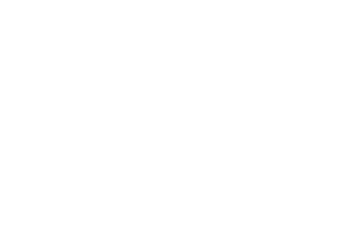

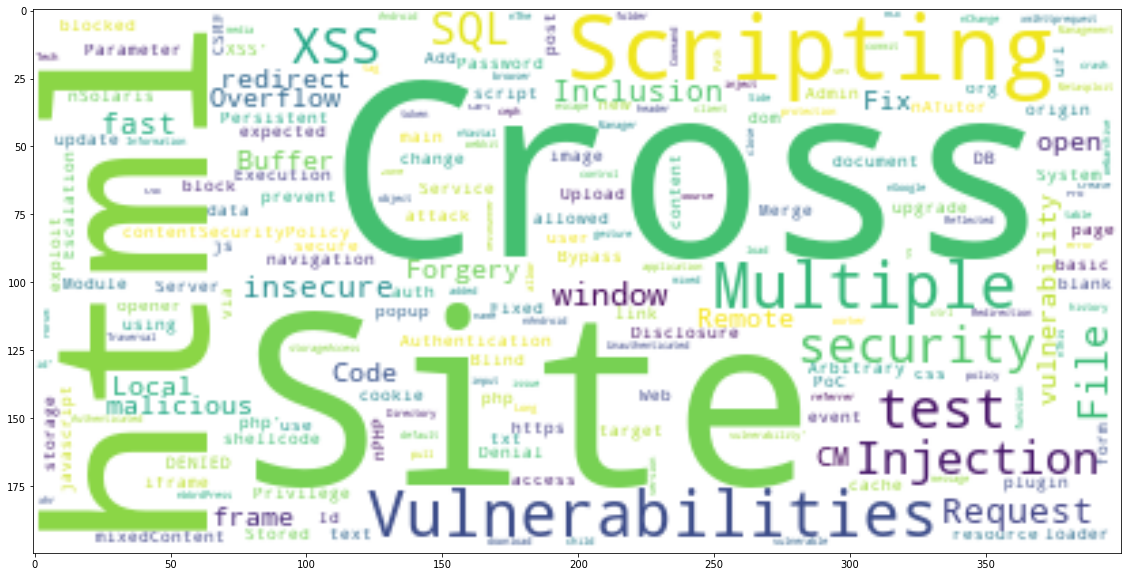

In [143]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(str(xss_message))
plt.axis("off")
plt.figure( figsize=(20,10))
plt.tight_layout(pad=0)
plt.imshow(word_cloud, interpolation='bilinear')
plt.show()



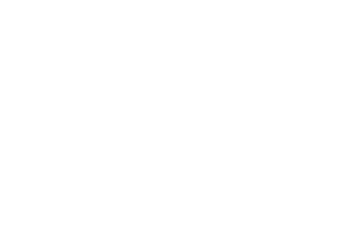

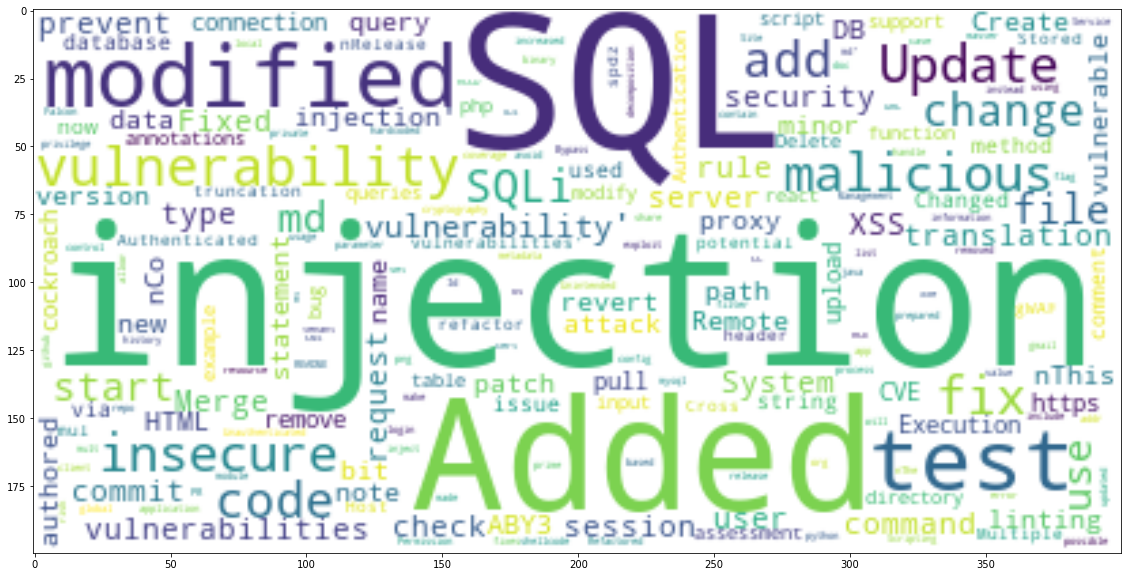

In [145]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(str(sql_message))
plt.axis("off")
plt.figure( figsize=(20,10))
plt.tight_layout(pad=0)
plt.imshow(word_cloud, interpolation='bilinear')
plt.show()


**References**:
1. https://towardsdatascience.com/introduction-to-git-data-extraction-and-analysis-in-python-e7e2bf9b4606
2. https://towardsdatascience.com/text-pre-processing-stop-words-removal-using-different-libraries-f20bac19929a
3. https://towardsdatascience.com/nlp-preprocessing-with-nltk-3c04ee00edc0
4. https://medium.com/swlh/how-to-train-word2vec-model-using-gensim-library-115b35440c90
5. Keywords related to vulnerabilities: [Identifying the characteristics of vulnerable code changes: an empirical study](https://www.researchgate.net/figure/Keywords-Associated-with-Vulnerabilities_tbl1_286077750)
6. [All the Things You Can Do With GitHub API and Python](https://towardsdatascience.com/all-the-things-you-can-do-with-github-api-and-python-f01790fca131)